                      0             1
Intercept  31205.647871  55856.584605
rd             0.651610      0.877638
adm           -0.175063      0.070057
mar           -0.015693      0.066472
ST_CAL      9394.268553  20448.026337
ST_FLO      8230.704764  20388.096204
ST_NY       8287.383501  20313.753118


/home/sushil/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


7407.234823080074

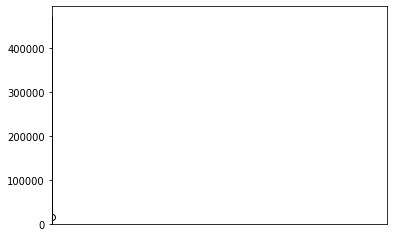

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

startup = pd.read_csv('/home/sushil/Documents/Assingment/MLR-Ass5/50_Startups.csv')
startup
startup.columns
startup.columns = ['rd','adm','mar','state','pf']
startup.columns

plt.hist(startup.rd)
plt.boxplot(startup.rd)

plt.hist(startup.adm)
plt.boxplot(startup.adm)

plt.hist(startup.mar)
plt.boxplot(startup.mar)

plt.hist(startup.pf)
plt.boxplot(startup.pf)

startup.head()
startup.corr()
startup.state.value_counts
startup['state'].nunique()
startup = pd.get_dummies(startup, columns = ['state'])
startup = startup.rename(columns = {'state_California' : 'ST_CAL', 'state_Florida' : 'ST_FLO', 'state_New York' : 'ST_NY'})
startup.head()
startup.columns

import seaborn as sns
sns.pairplot(startup)

# Preparing model
import statsmodels.formula.api as smf

ml1 = smf.ols('pf~rd+adm+mar+ST_CAL+ST_FLO+ST_NY',data=startup).fit()

ml1.params
ml1.summary()

# Preparing model based on variable

mladm = smf.ols('pf~adm',data=startup).fit()
mladm.params
mladm.summary()

mlmar = smf.ols('pf~mar',data=startup).fit()
mlmar.params
mlmar.summary()

ml2 = smf.ols('pf~adm+mar',data=startup).fit()
ml2.params
ml2.summary()

import statsmodels.api as sm
sm.graphics.influence_plot(ml_1)

startup_new = startup.drop(startup.index[[49,48,46]],axis=0)
startup_new

ml1_new = smf.ols('pf~rd+adm+mar+ST_CAL+ST_FLO+ST_NY',data=startup_new).fit()
ml1_new.params
ml1_new.summary()

print(ml1_new.conf_int(0.01))
startup_new.head()

# Predicted value of profit

pf_pred = ml1_new.predict(pd.DataFrame(startup_new[['rd','adm','mar','ST_CAL','ST_FLO','ST_NY']]))
pf_pred

rsd_rd = smf.ols('rd~adm+mar+ST_CAL+ST_FLO+ST_NY',data=startup_new).fit().rsquared
vif_rd = 1/(1-rsd_rd)
vif_rd

rsd_adm = smf.ols('adm~rd+mar+ST_CAL+ST_FLO+ST_NY',data=startup_new).fit().rsquared
vif_adm = 1/(1-rsd_adm)
vif_adm

rsd_mar = smf.ols('mar~rd+adm+ST_CAL+ST_FLO+ST_NY',data=startup_new).fit().rsquared
vif_mar = 1/(1-rsd_mar)
vif_mar

d1 = {'variable':['rd','adm','mar'],'VIF':[vif_rd,vif_adm,vif_mar]}
vif_frame = pd.DataFrame(d1)
vif_frame

sm.graphics.plot_partregress_grid(ml1_new)

final_model = smf.ols('pf~rd+mar+ST_CAL+ST_FLO+ST_NY', data = startup_new).fit()
final_model.params
final_model.summary()

startup_new.columns

pred = final_model.predict(pd.DataFrame(startup_new[['rd','mar', 'ST_CAL', 'ST_FLO', 'ST_NY']]))
pred

plt.scatter(startup_new.pf, pred);plt.xlabel('Actual Values');plt.ylabel('Predicted Values')

len(startup_new)

plt.scatter(pred, final_model.resid_pearson);plt.axhline(y = 0, color = 'r')
plt.hist(final_model.resid_pearson)

import pylab
from scipy import stats as st
st.probplot(final_model.resid_pearson, dist = 'norm', plot = pylab)

from sklearn.model_selection import train_test_split
startup_train,startup_test = train_test_split(startup_new,test_size = 0.3)

model_train = smf.ols('pf~rd+mar+ST_CAL+ST_FLO+ST_NY', data = startup_train).fit()
model_train.summary()

train_pred = model_train.predict(startup_train)
train_pred

train_resid = train_pred - startup_train.pf
train_resid

train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

model_test = smf.ols('pf~rd+mar+ST_CAL+ST_FLO+ST_NY',data=startup_test).fit()
model_test.params
model_test.summary()

test_pred = model_train.predict(startup_test)
test_pred

test_resid = test_pred - startup_test.pf
test_resid

test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse